# Burradale Wind Farm - Turbine Angular Velocity from Computer Vision and Signal Analysis (FindPeaks, FFT, STFT, CWT)

_Alistair Boyer_

## Introduction


### Burradale Wind Turbine

Shetland is a group of Scottish islands that lie 110 miles north east from the UK mainland. The islands are quite small so enjoy a moderate temperature regulated by the surrounding ocean; and their exposed position results in copious amounts of wind. This surfeit of wind is [bad for trees](https://www.shetland.org/blog/treeless-thats-changing) but great for renewable energy!

In the heart of the Shetland mainland's lies [Burradale Wind Farm](https://www.burradale.co.uk/).
The wind farm started in 2000 with three [Vestas V47 (660&nbsp;MW, 47&nbsp;m blade diameter)](https://en.wind-turbine-models.com/turbines/13-vestas-v47) turbines named Miny, Betsy and Brenda.
In 2003, two additional [Vestas V52 (850&nbsp;MW, 52&nbsp;m blade diameter)](https://en.wind-turbine-models.com/turbines/71-vestas-v52) turbines were added, named Sally and Karen.
The individual turbines are clearly visible on the [Google Earth satellite view](https://earth.google.com/web/@60.16347369,-1.23966317,119.59506876a,2812.46632513d,35y,0h,0t,0r) pinpointed by the long shadows cast by the 50&nbsp;m blades sitting atop their tall towers.

There is a [live webcam](https://www.shetlandwebcams.com/burradale-wind-farm/), part of the [Shetland Webcams](https://www.shetlandwebcams.com/) network, that shows the wind farm 24&nbsp;hours per day and includes saved footage from the Aurora Borealis that appears regularly thanks to Shetland's latitude. The webcam looks down on the beautiful Tingwall Valley, rich in green colours. The clouds whip by blown by the strong winds. On the left of the frame, there is a single wind turbine that consistently spins. This is Sally. Sally and friends boast impressive performance: they have product an average of 52% of their maximum capacity and in 2005 set a new world record 57.9%. Together the wind turbines produce enough energy for [4000 homes or 150 Eurostar trains](https://en.wikipedia.org/wiki/Orders_of_magnitude_(power)).

This article describes the process of capturing the Burradale wind farm webcam stream and calculating the rotational velocity of the turbine.

### History of Wind Power

Humans have harnessed wind power for thousands of years, with evidence of wind-powered boats being found on the Nile.
The power of wind was exploited throughout the middle ages as mills ground grain into flour.
In the 1830s Michael Faraday built the first electric motor and soon afterwards attention was turned to using wind power to generate electricity.
The history of wind power generation in the UK started 240 miles south of Shetland when James Blyth constructed a wind turbine in Marykirk.

As the rise in occurrence of extreme weather events give a clear sign of the effects of global warming, Sally and other wind turbines provide an important contribution to a sustainable future.

### Monitoring Rotation

Complex machines are carefully monitored for performance and output.
Monitoring equipment operation provides an essential feedback mechanism and is a key component of fault detection.
In expensive machines, such as wind turbines, a combination of various techniques and multiple sensors will be used to guard against any failures and verify the quality of output data. In cheaper machines, such as a hobby drone, there will be one or none of these. Some of the ways to monitor rotational speed include:
- Equipment power can be monitored for bulk power consumption (motors) or generation (generators).
- Modern electronics can analyse the instantaneous signal in the electrical coils to be analysed for position and speed.
- Dedicated sensors can be attached to a rotating shaft that have optical, magnetic or electrical encoders to generate  pulses as the machine rotates.

Remote monitoring can be achieved by transmitting information from the equipment to a remote station; or gathered directly at the remote location. Increasingly, remote monitoring using fixed cameras, or even cameras attached to [drones](https://www.dji.com/uk/camera-drones?site=brandsite&from=nav) or [robots](https://bostondynamics.com/products/spot/), is used to provide data about condition and performance. The rotational output, and therefore power output, of wind turbines is directly linked to their 50&nbsp;m blades making a suitable target for remote monitoring using a camera.

### Research

The value of vision-based rotation monitoring using cameras has driven a range of research into this area.
 _N.B. Some links to research articles are behind publishers paywalls - if you web search the title of the article you will often find the Author's own free version of the research._

Digital cameras that are ubiquitous in e.g. smartphones have an array of pixels that capture colour and light information when requested "click" for a photo, or with a constant frame-rate for a video. This can produce some significant challenges when trying to analyse for rotational information:
- If the shutter speed is not fast enough compared to the moving object, the the image will be [motion-blurred](https://en.wikipedia.org/wiki/Motion_blur) and the precise position difficult to calculate. In [_A Computer Vision Method for Measuring Angular Velocity_](https://doi.org/10.1016/j.optlaseng.2007.02.005) Li _et al._ 2007 exploited motion blur to calculate the angular velocity of a spinning object.
- If the rotation is a multiple of the frame-rate of image capture then strange effect can occur where rotating objects [appear stationary, commonly seen for helicopter blades](https://www.youtube.com/watch?v=mPHsRcI5LLQ) and known as the [wagon-wheel](https://en.wikipedia.org/wiki/Wagon-wheel_effect) effect.
- Historic influence and data transfer limitations mean that the images on a digital camera are usually captured with [rolling shutter](https://en.wikipedia.org/wiki/Rolling_shutter), i.e. the pixels capture images at very slightly different times meaning that the shape of moving objects can be warped along one axis of the image. This effect was exploited for speed measurement in [_Measuring the Angular Velocity of a Propeller with Video Camera Using Electronic Rolling Shutter_](https://www.hindawi.com/journals/js/2018/1037083/) (Li _et al._ 2018) and successfully extracted speeds for objects moving faster than the camera speed.


In the context of a wind turbine, the rotational speed and size is such that a regular webcam can capture valuable information.
There are two subtly different approaches to extracting a speed from a video feed:
1. The periodic similarity of the image is measured: how long does it take for the image to look the same as when the analysis started, i.e. the blade to complete &frac13; of a rotation for turbines with 3 identical blades. 
2. Two images are captured with a known time interval and the rotation between images is calculated.

Selected research in the area of computer vision for rotational velocity calculation:
- [A Computer-Vision Based Rotating Speed Estimation Method for Motor Bearing Fault Diagnosis](https://dx.doi.org/10.1088/1361-6501/aa650a) (Guo, Lu, _et al._ 2017) Here robust feature extraction is used to find angular velocity from a video and this is correlated with the frequency from an audio recording to help with fault identification.
- [Rotational Speed Measurement Using a Low-Cost Imaging Device and Image Processing Algorithms](https://dx.doi.org/10.1109/I2MTC.2018.8409665) (Wang _et al._ 2018)
This research describes how rotational speed can be measured using simple cameras focused on analysing differences between images and achieves <1% error using the [Chirp-Z transform](https://en.wikipedia.org/wiki/Chirp_Z-transform).
- [Estimation of Wind Turbine Angular Velocity Remotely Found on Video Mining and Convolutional Neural Network](https://doi.org/10.3390/app10103544) (Xin _et al._ 2020)
Here, neural networks were trained to detect wind turbine hubs, then blade detection was used to calculate the blade position and calculate rotational speed.
- [Using Machine Learning and Computer Vision to Estimate the Angular Velocity of Wind Turbines in Smart Grids Remotely](https://doi.org/10.1016/j.egyr.2021.07.077) (Bahaghighat _et al._ 2021).
This research used ML and CV to identify the wind turbine hub within an image; then analysed the images centred on that hub to calculate rotation information based on FFT, STFT and WT with 90% accuracy.
- [Instantaneous Rotational Speed Measurement of Wind Turbine Blades using a Marker-Tracking Method](https://ieeexplore.ieee.org/document/9806658) (Liao _et al._ 2022)
This article describes a method for analysing video of turbines to extract speed by tracking individual markings on the blades reducing in an impressive &lt;1% error.

Event cameras are a type of engineering camera that do not suffer from the problems of a normal camera described above. These cameras differ in that their pixel sensors are constantly on and scanning for changes. This makes them ideally suited for monitoring changes, especially rapid changes but not so good for your holiday photos.
Research papers that describe using event cameras to capture rotation information include:
- [High Speed Rotation Estimation with Dynamic Vision Sensors](https://arxiv.org/pdf/2209.02205) (Shen _et al._ 2022).
Applied to fast moving drone blades and compatible with a hand held camera.
- [Event-Based Angular Speed Measurement and Movement Monitoring](https://www.mdpi.com/1424-8220/22/20/7963) (Azevedo, Fernandes _et al._ 2022).
Pioneering example using the example of rotating fan blades.
- [Accurate Angular Velocity Estimation With an Event Camera](https://ieeexplore.ieee.org/document/7805257) [(PDF)](https://rpg.ifi.uzh.ch/docs/RAL16_Gallego.pdf) (Gallego and Scaramuzza, 2017).
Algorithms to extract angular velocity from event camera information.

# Results


In [8]:
# imports
import pathlib

import numpy  # pip install numpy
import matplotlib.pyplot as plt  # pip install matplotlib
import m3u8  # pip install m3u8
import cv2  # pip install opencv-pyhton
import scipy  # pip install scipy
import pywt  # pip install pywt

### Data Source

The first challenge is to obtain the source data for the challenge.
Searching the network traffic of the webcam page using the browser "Network" analysis in the DevTools window for `*.m3u8` shows playlists at
https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/playlist.m3u8
or
https://zetcast-eu.b-cdn.net/cf_burradale/BurradaleABR/playlist_dvr.m3u8.


In [11]:
BURRADALE_URI = "https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/playlist.m3u8"
BURRADALE_URI_DVR = "https://zetcast-eu.b-cdn.net/cf_burradale/BurradaleABR/playlist_dvr.m3u8"

The `playlist.m3u8` files do not contain video image itself but are a playlist of four different streams corresponding to different resolutions.
The [m3u8 package](https://pypi.org/project/m3u8/) [`pip install m3u8`] paste allows easy interaction with `.m3u8` information.
The function `def get_playlist_resolutions()` loads a `.m3u8` file from the url supplied then performs a dictionary comprehension using the resolution (`.stream_info.resolution`) as keys and URI (`.absolute_uri`) as values for each of the playlists in the `.playlists` property.
In contrast, the resulting `chunks.m3u8` files do not contain playlist information but rather a list of all the segments that make up the video stream. Each of the segments points to a `.ts` or video transport stream file URI.

In [13]:
def get_playlist_resolutions(url: str) -> dict[tuple[int, int], str]:

    # load m38u file
    M3U8 = m3u8.load(url)

    # get resolutions from playlist objects
    return {
        p.stream_info.resolution: p.absolute_uri
        for p in M3U8.playlists
    }


RESOLUTIONS = get_playlist_resolutions(BURRADALE_URI)

RESOLUTIONS

{(1280,
  720): 'https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/burradale/stream_720p/chunks.m3u8',
 (960,
  540): 'https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/burradale/stream_540p/chunks.m3u8',
 (640,
  360): 'https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/burradale/stream_360p/chunks.m3u8',
 (426,
  240): 'https://zetcast-gb.b-cdn.net/cf_burradale/BurradaleABR/burradale/stream_240p/chunks.m3u8'}

The [opencv-python library](https://pypi.org/project/opencv-python/) [`pip install opencv-python`] has a vast array of powerful image processing tools.
opencv can open streamed segments directly as a `cv2.VideoCapture()` object.
The resulting VideoCapture object has a `.read()` method that returns a `tuple` of the `bool` representing the success of the operation; and the result of grabbing and decoding the next video frame.
Here two frames are captured with three frames discarded in between so that the difference is more apparent. To free up the resources are released. The images can be displayed using `maptplotlib.pyplot` but need to be converted from BGR to RGB colour space first using `cv2.cvtColor()`. It is also helpful to have grayscale versions of the images, again using `cv2.cvtColor()`.

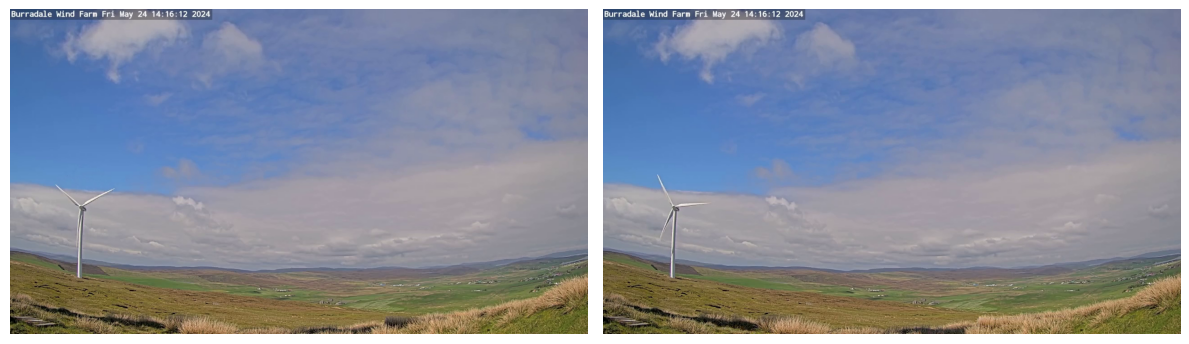

In [15]:
# choose resolution
resolution = (1280, 720)

# capture frames
cap = cv2.VideoCapture(RESOLUTIONS[resolution])

# initialise the frames
two_frames = [None, None]

# capture the first frame
success, two_frames[0] = cap.read()
assert success

# skip 3 frames
[cap.read() for _ in range(3)]

# capture the second frame
success, two_frames[1] = cap.read()
assert success

# clean up resources
cap.release()
cv2.destroyAllWindows()

# correct the colour
two_frames_gray = [cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) for frame in two_frames]
two_frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in two_frames]

# plot the images
fig, ax = plt.subplots(1, 2,  figsize=(12, 4))
for n in range(2):
    ax[n].axis("off")
    ax[n].imshow(two_frames[n])
fig.tight_layout()
fig.savefig("BurradaleTwoImages.png")
plt.show()

### Turbine Detection

This webcam is fixed so there is no need to computationally find the turbine within the image. The location of the turbine hub can be found by manually looking at the coordinates within any basic graphics software. Using an image from the 1280x720 stream, the hub is at `440, 158` and the turbine blades have a radius of `100`&nbsp;pixels.

These numbers need converting depending on the resolution selected and this is performed by the `centroid_radius()` function. The function calculates the `scale` factor according to the resolution relative to 1280, then multiplies the base values accordingly.

Only the turbine blades section of the image is required. This section can be described by vertical and horizontal slices that are calculated from the top, bottom, left and right of the relevant area by the `turbine_slices()` function.






In [18]:
BASE_TURBINE_CENTROID = numpy.asarray((440, 158), dtype="int")
BASE_TURBINE_RADIUS = 100


def centroid_radius(resolution):
    # the base centroid and radius were measured from the 1280 image

    # calculate the scale factor
    scale = resolution[0] / 1280

    # scale the BASE values by the appropriate amount and convert to int
    centroid = (BASE_TURBINE_CENTROID * scale)
    radius = (BASE_TURBINE_RADIUS * scale)

    return centroid, radius


def turbine_slices(resolution):

    # get the centroid and radius
    centroid, radius = centroid_radius(resolution)

    # find the corners
    bottom, left = centroid - radius
    top, right = centroid + radius

    # return the slices
    return (
        slice(int(bottom), int(top)),  # vertical slice
        slice(int(left), int(right)),  # horizontal slice
    )

The region of interest return by the slice can be analysed directly.
However, the sharp blades of the turbines lend themselves to edge detection.
Edge dection will focus on the blades and should reduce the impact of noise in any future processing.
Three different algorithms for edge detection that are available in opencv are:
[Laplacian](https://docs.opencv.org/4.x/d5/db5/tutorial_laplace_operator.html) (grayscale input),
[Sobel](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html) (grayscale input)
and [Canny](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html) (color input).
The edge detection results are tuned to make binary be comparing with an `EDGE_CUTOFF` value.

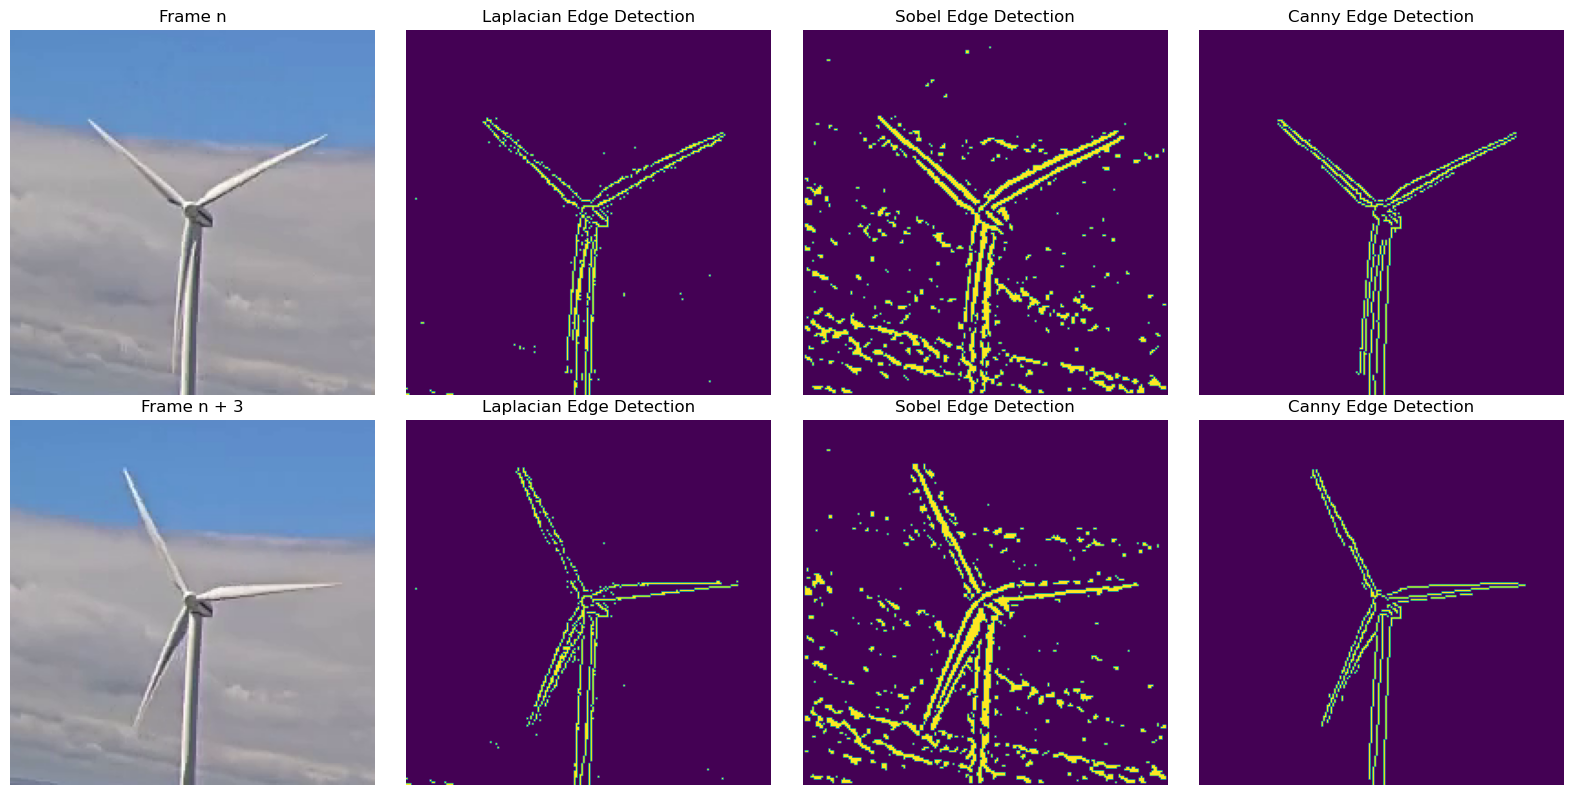

In [20]:
# slices
slices = turbine_slices(resolution)


EDGE_CUTOFF = 25

def laplacian(frame):
    return cv2.Laplacian(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cv2.CV_64F) > EDGE_CUTOFF

def sobel(frame):
    return cv2.Sobel(src=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) > EDGE_CUTOFF

def canny(frame):
    return cv2.Canny(image=frame, threshold1=100, threshold2=200, apertureSize=3) > EDGE_CUTOFF



# setup the plot
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0, 0].set_title("Frame n")
ax[1, 0].set_title("Frame n + 3")


# plot the sliced images
for n in range(2):
    ax[n, 0].axis("off")
    ax[n, 0].imshow(two_frames[n][slices])


# plot the Laplacian detected edges
for n in range(2):
    ax[n, 1].set_title("Laplacian Edge Detection")
    ax[n, 1].axis("off")
    ax[n, 1].imshow(laplacian(two_frames[n][slices]))


# plot the Sobel detected edges
for n in range(2):
    ax[n, 2].set_title("Sobel Edge Detection")
    ax[n, 2].axis("off")
    ax[n, 2].imshow(sobel(two_frames[n][slices]))


# plot the Canny detected edges
for n in range(2):
    ax[n, 3].set_title("Canny Edge Detection")
    ax[n, 3].axis("off")
    ax[n, 3].imshow(canny(two_frames[n][slices]))


fig.tight_layout()
fig.savefig("BurradaleEdges.png")
plt.show()

### Periodic Difference Analysis

To extract the rotational speed information from the video source by analysing periodic difference, the first thing to do is capture more information, i.e. `n = 200` images, only keeping the relevant sliced region of interest.

In [23]:
n = 200

# open the video capture
cap = cv2.VideoCapture(RESOLUTIONS[resolution])

# capture n frames, slicing down to the turbine
frames = numpy.stack([cap.read()[1][turbine_slices(resolution)] for _ in range(n)])

# capture the framerate
prop_fps = cap.get(cv2.CAP_PROP_FPS)

# clean up after capture
cap.release()
cv2.destroyAllWindows()

# calculate the grayscale image
frames_gray = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]

The difference between frames can be implemented simply as a `calculate_frame_similarity()` function:
- First the appropriate edge detection algorithm is applied to the list of frames.
- Then the similarity to the reference frame `frames[reference]`, that defaults to the middle frame, is calculated using a bitwise and (`&`) operation and calculating the sum with the `.sum()` method.

opencv also provides a [function](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html) to perform this type of analysis: `cv2.matchTemplate()`. 
The `matchTemplate` function takes the two frames for comparison and a method to calculate difference.

All of the values are offset to a range between 0.0 and 1.0 using the `scale_0_to_1()` function.
The difference for each of the edge detection algorithms can be plotted and shows a clear periodic blip as the blade rotates past the original position.

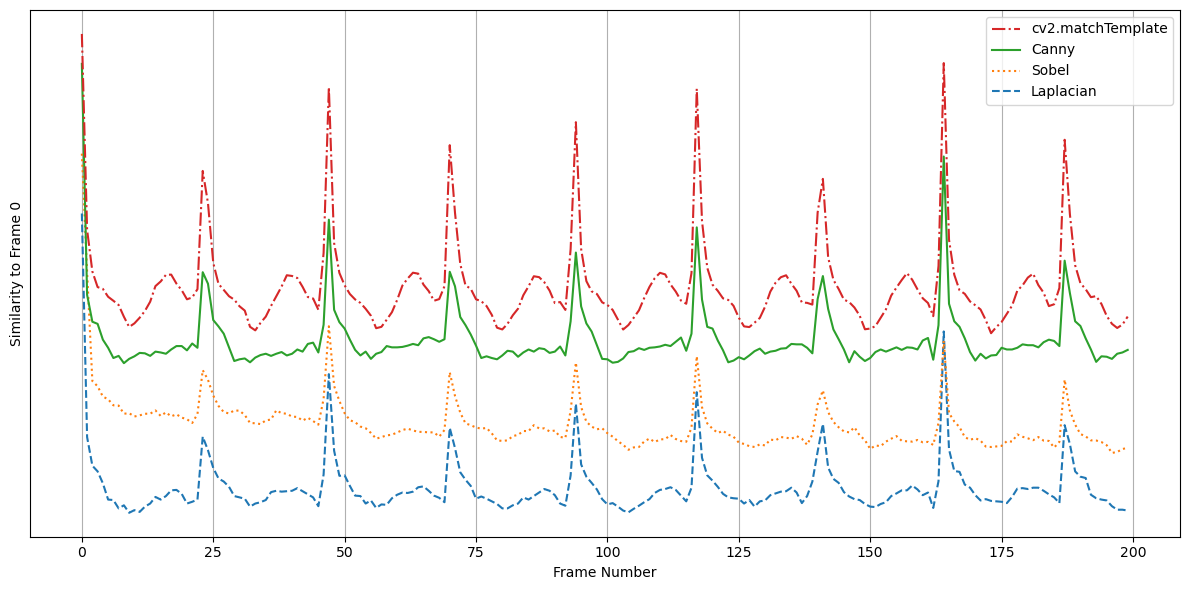

In [59]:
def scale_0_to_1(array):
    
    # reference to zero
    array -= array.min()
    
    # normalise between 0.0 and 1.0
    array = array / array.max()
    
    return array
    

def calculate_frame_similarity(frames, edge_detection, reference=0):
    
    # apply the edge detection
    frames = [edge_detection(frame) for frame in frames]
    
    # compare the frame with the reference frame
    frame_diff = numpy.asarray([(frames[reference] & frame).sum() for frame in frames])
    
    return frame_diff


# edge detection
laplacian_diff = scale_0_to_1(calculate_frame_similarity(frames, laplacian))
sobel_diff = scale_0_to_1(calculate_frame_similarity(frames, sobel))
canny_diff = scale_0_to_1(calculate_frame_similarity(frames, canny))

# matchTemplate
match_diff = scale_0_to_1(numpy.asarray([cv2.matchTemplate(frame, frames[0], cv2.TM_CCOEFF_NORMED).flatten()[0] for frame in frames]))


# initialise plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_xlabel("Frame Number")
ax.set_yticks([])
ax.set_ylabel("Similarity to Frame 0")

# plot differences, add 0.2 offsets for visibility
ax.plot(0.0 + laplacian_diff, "--", label="Laplacian")
ax.plot(0.2 + sobel_diff, ":", label="Sobel")
ax.plot(0.5 + canny_diff, "-", label="Canny")
ax.plot(0.6 + match_diff, "-.", label="cv2.matchTemplate")
ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.grid()

# display plot
fig.tight_layout()
fig.savefig("BurradalePeriodicDifference.png")
plt.show()

In [28]:
# test data with known period

if False:
    
    prop_fps = 30
    
    # test period
    test_period = 33

    # create x axis
    xs = numpy.linspace(0, 199, 200)

    # create sine wave with known period and set range between 0 and 1 to match difference output
    diff_signal = (numpy.cos(xs * numpy.pi * 2 / test_period) + 1.0) * 0.5

    # add synthetic noise
    diff_signal += numpy.random.randn(200) * 0.01

    plt.plot(diff_signal)

### Signal Processing for Angular Velocity

The peaks represent when each blade is in the same position as the original frame, i.e. the turbine has complete &frac13; of a rotation.
The `scipy.signal` module has signal detection tools, including a [peak finding function `find_peaks()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html). 
Tuning the peak detection parameters is key for accuracy, but using the differences calculated using `cv2.matchTemplate` (`match_diff`) with a prominence value of `0.2` works well.
The average number of frames between peaks `sig_period` can be calculated by slicing the peaks and taking the mean of the difference `(signal_peaks[1:] - signal_peaks[:-1]).mean()`. 
The number of frames can be converted to a rotation period of `3 * sig_period / prop_fps` accounting for the 3 turbine blades and using the FPS rate taken from the capture source.

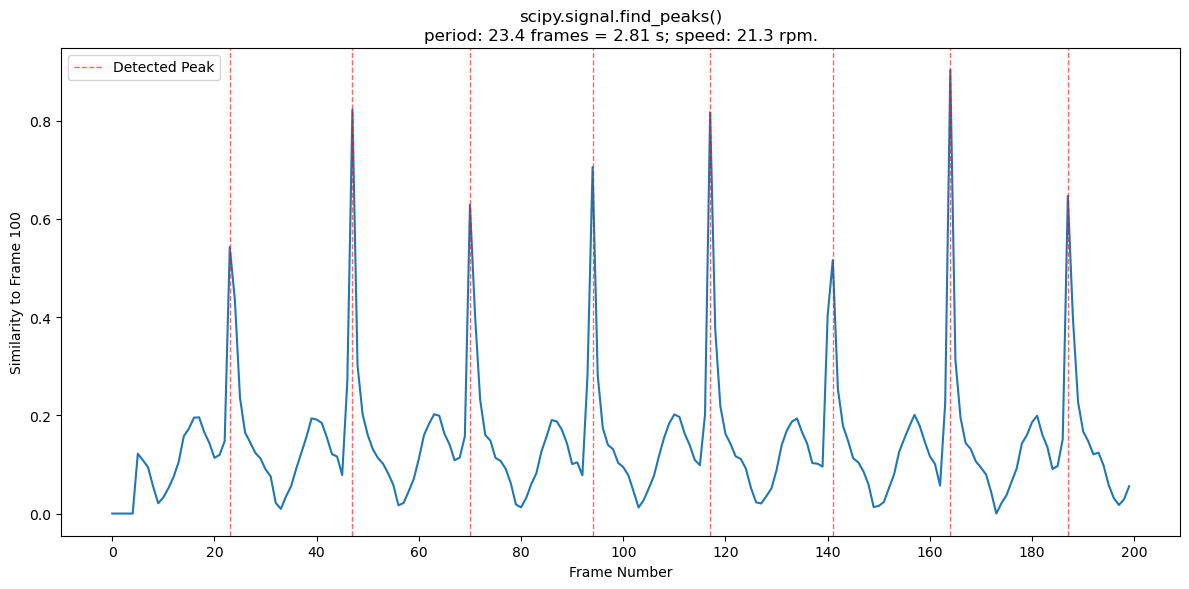

In [31]:
# signal processing to find peaks
signal_peaks, signal_properties = scipy.signal.find_peaks(
    diff_signal,
    prominence=0.2,
)

# find the average gap between peaks
sig_period = (signal_peaks[1:] - signal_peaks[:-1]).mean()

# initialise plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("Frame Number")
ax.set_ylabel("Similarity to Frame 0")
ax.set_title(f"scipy.signal.find_peaks()\nperiod: {sig_period:.1f} frames = {3*sig_period/prop_fps:.2f} s; speed: {20 * prop_fps / sig_period:.1f} rpm.")
ax.set_xticks(range(0, 201, 20))

# add difference
ax.plot(diff_signal)

# add vertical lines at signal peaks
for vline in signal_peaks:
    ax.axvline(vline, color="#ff000099", linestyle="--", linewidth=1, label="Detected Peak")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1], labels[:1])
    
# display plot
fig.tight_layout()
fig.savefig("BurradaleFindPeaks.png")
plt.show()

Looking at the different peaks shows that several are chunky and their tops are poorly resolved leading to this loss of accuracy. 
scipy has tools for interpolating values along low resolution signals that allows in-between values to be calculated in various ways including as [BSplines](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html).
A BSpline `interpolator` can be constructed via `scipy.interpolate.splrep()` from the known data points: `match_diff`.
A larger set of interpolated y values (`600`) can now be calculated from a suitably extended set of x values.
The new results can be processed as before and deliver more accurate value.

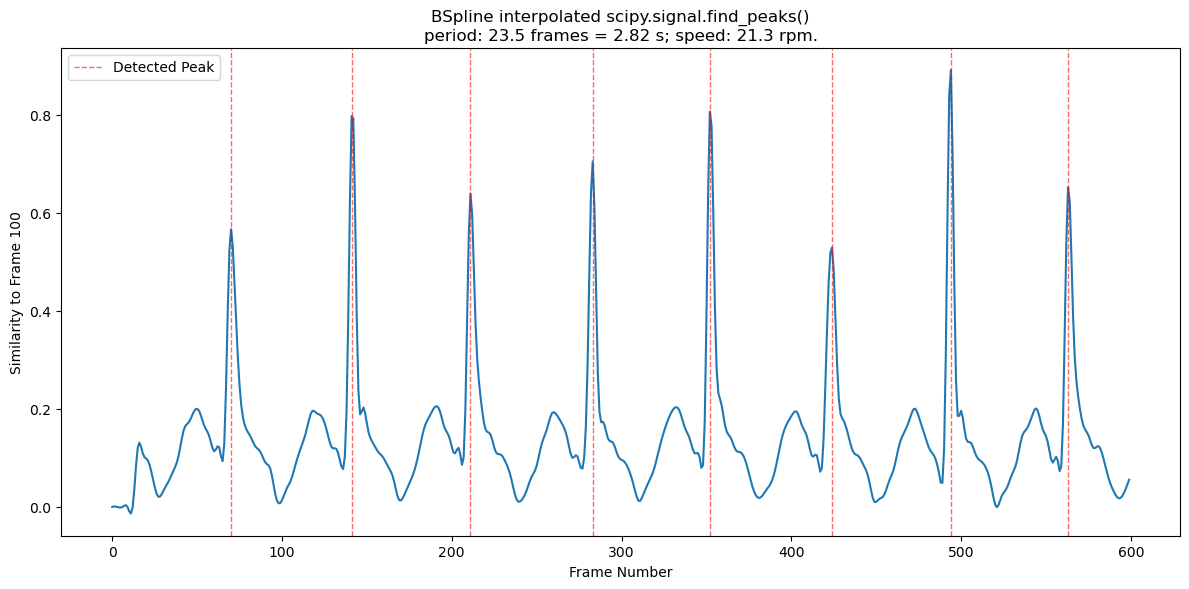

In [33]:
interpolator = scipy.interpolate.BSpline(
    *scipy.interpolate.splrep(range(len(diff_signal)), diff_signal)
)

# create new x axis with more data points and calculate interpolated values
xs = numpy.linspace(0, len(diff_signal) - 1, 600) 
interpolated = interpolator(xs)

# signal processing to find peaks
signal_peaks, signal_properties = scipy.signal.find_peaks(
    interpolated,
    prominence=0.2,
)

# find the average gap between peaks and adjust for scale
sig_period = (signal_peaks[1:] - signal_peaks[:-1]).mean() * 200 / 600

# initialise plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("Frame Number")
ax.set_ylabel("Similarity to Frame 100")
ax.set_title(f"BSpline interpolated scipy.signal.find_peaks()\nperiod: {sig_period:.1f} frames = {3*sig_period/prop_fps:.2f} s; speed: {20 * prop_fps / sig_period:.1f} rpm.")

# add difference
ax.plot(interpolated)

# add vertical lines at signal peaks
for vline in signal_peaks:
    ax.axvline(vline, color="#ff000099", linestyle="--", linewidth=1, label="Detected Peak")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:1], labels[:1])
    
# display plot
fig.tight_layout()
fig.savefig("BurradaleFindPeaksInterpolated.png")
plt.show()

Peak finding and then calculating the distance between peaks is a rather manual approach to this problem.
For repeating signals there are powerful mathematical methods that can be employed to extract frequency information.
[Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform) is a powerful algorithm that [extracts frequency data from a signal](https://www.youtube.com/watch?v=spUNpyF58BY). 

FFT is designed for AC signals so the DC component can be removed by subtracting the mean from the signal (`match_diff - match_diff.mean()`).
The FFT is calculated using `numpy.fft.rfft()` that allows easy extraction of the real component using `numpy.abs()`.
The appropriate frequency information can be attached to the FFT by using `numpy.fft.rfftfreq()`.
As above, BSpline interpolation provides a mechanism to detect the true peak top.
The index of the maximum frequency can be found using `numpy.argmax()` and used to look up the frequency from `fft_freqs`.
The plotted output shows a clear peak corresponding to the frequency within our signal.
However, because the signal is not a pure sine wave, there are other peaks within the output.

A [Chirp-Z Transform](https://en.wikipedia.org/wiki/Chirp_Z-transform) analysis `scipy.signal.czt()` gave identical  results to FFT.

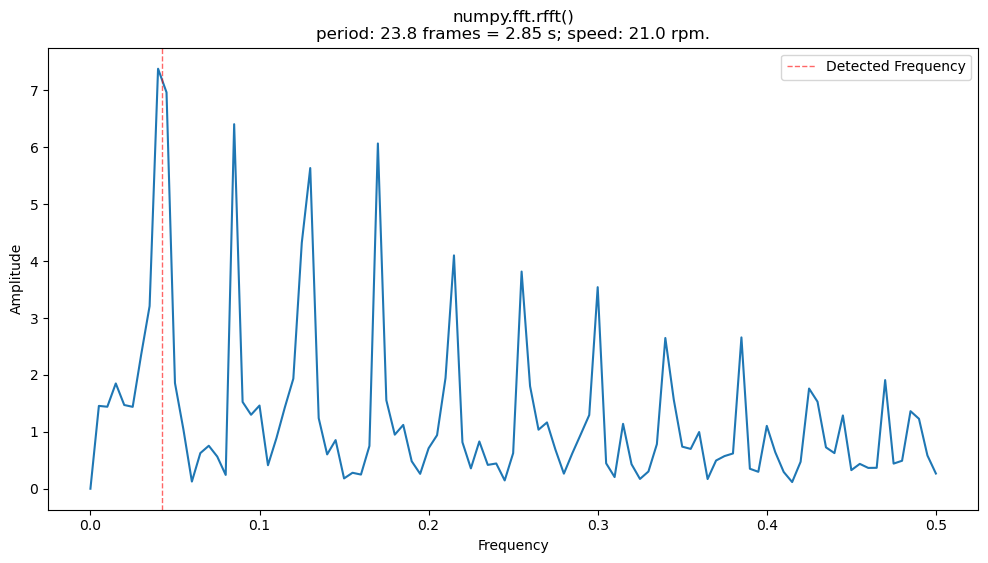

In [61]:
# remove DC component by subtracting the mean; compute the real fft; and convert to absolute values
fft_amplitude = numpy.abs(numpy.fft.rfft(diff_signal - diff_signal.mean()))

# get the rfft frequencies (x axis)
fft_freqs = numpy.fft.rfftfreq(len(diff_signal)) 

# interpolate
interpolator = scipy.interpolate.BSpline(*scipy.interpolate.splrep(fft_freqs, fft_amplitude))
xs = numpy.linspace(fft_freqs.min(), fft_freqs.max(), 500) 
interpolated = interpolator(xs)

# find the maximum interpolated frequency and convert to period
fft_freq = xs[numpy.argmax(interpolated)]
fft_period = 1 / fft_freq

# display the results
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title(f"numpy.fft.rfft()\nperiod: {fft_period:.1f} frames = {3 * fft_period / prop_fps:.2f} s; speed: {20 * prop_fps / fft_period:.1f} rpm.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")

ax.plot(fft_freqs, fft_amplitude)
ax.axvline(fft_freq, color="#ff000099", linestyle="--", linewidth=1, label="Detected Frequency")
ax.legend()
fig.savefig("BurradaleFFT.png")
plt.show()

There is a repeating signal across this data so it is suitable for [Short Term Fourier Transform (STFT) analysis](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).
STFT splits the signal into smaller windows and performs separate FFT analysis on each.
The output is a 2D array of values corresponding to each window so the index of the maximum frequency for each can be found using `numpy.argmax()` and used to look up the frequency from `stft_freqs`. The `numpy.mean()` across all values gives the output frequency and period.
Again, BSpline interpolation was important here to estimate the top of the relevant peaks (although the interpolated frequency is indicated, the raw instead of interpolated amplitudes are shown).

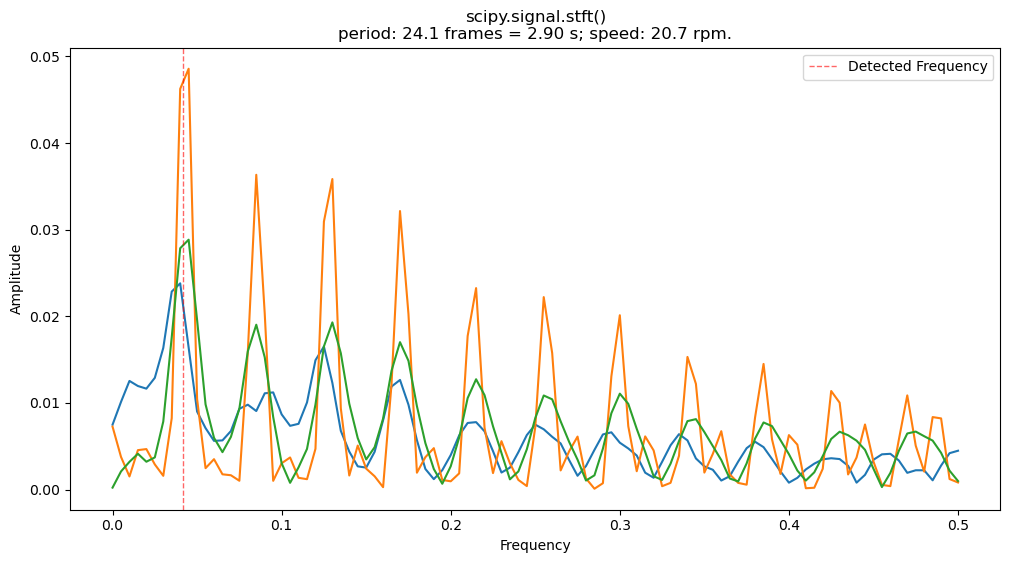

In [37]:
# remove DC component by subtracting the mean; compute the stft; and convert to absolute values
stft_freqs, stft_bins, stft_amplitudes = scipy.signal.stft(
    diff_signal - diff_signal.mean(),  # remove DC offset
    nperseg=len(diff_signal) // 1,  # specify window size, gives 2n+1 windows
    noverlap=None,  # default overlap
)
stft_amplitudes = numpy.abs(stft_amplitudes)

# perform interpolation
xs = numpy.linspace(fft_freqs.min(), fft_freqs.max(), 500) 
interpolated = [scipy.interpolate.BSpline(*scipy.interpolate.splrep(stft_freqs, a))(xs) for a in stft_amplitudes.T]

# find the maximum interpolated frequency and convert to period
stft_freq = numpy.mean([xs[numpy.argmax(a)] for a in interpolated])
stft_period = 1 / stft_freq

# display the results
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title(f"scipy.signal.stft()\nperiod: {stft_period:.1f} frames = {3 * stft_period / prop_fps:.2f} s; speed: {20 * prop_fps / stft_period:.1f} rpm.")
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")

ax.plot(stft_freqs, stft_amplitudes)
ax.axvline(stft_freq, color="#ff000099", linestyle="--", linewidth=1, label="Detected Frequency")
ax.legend()
fig.savefig("BurradaleSTFT.png")
plt.show()

The final strategy considered for frequency extraction was [Continuous Wavelet Transform (CWT)](https://en.wikipedia.org/wiki/Continuous_wavelet_transform).
This functionality is available in the PyWavelets package [[pip install pywt]](https://pypi.org/project/PyWavelets/) (CWT is being removed from scipy).
In this approach a base wavelet is [analysed at various scales](https://www.youtube.com/watch?v=jnxqHcObNK4) and compared with the input signal.
How well the wavelet matches at each scale reveals information about the input signal.
The result is presented as a 2D depiction of the intensity of various frequencies over time.

The `pywt.cwt()` function takes the signal analysed (again, with DC component removed by subtracting the `.mean()`) as well as the range of frequencies to consider and [type of wavelet to process](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html), here the Ricker (aka Mexican hat) wavelet.
The maximum frequency can be calculated by summing the amplitude along the appropriate axis `.sum(axis=1)` and used as an index to look up the associated period.
Again, interpolation is valuable to more accurate estimation.

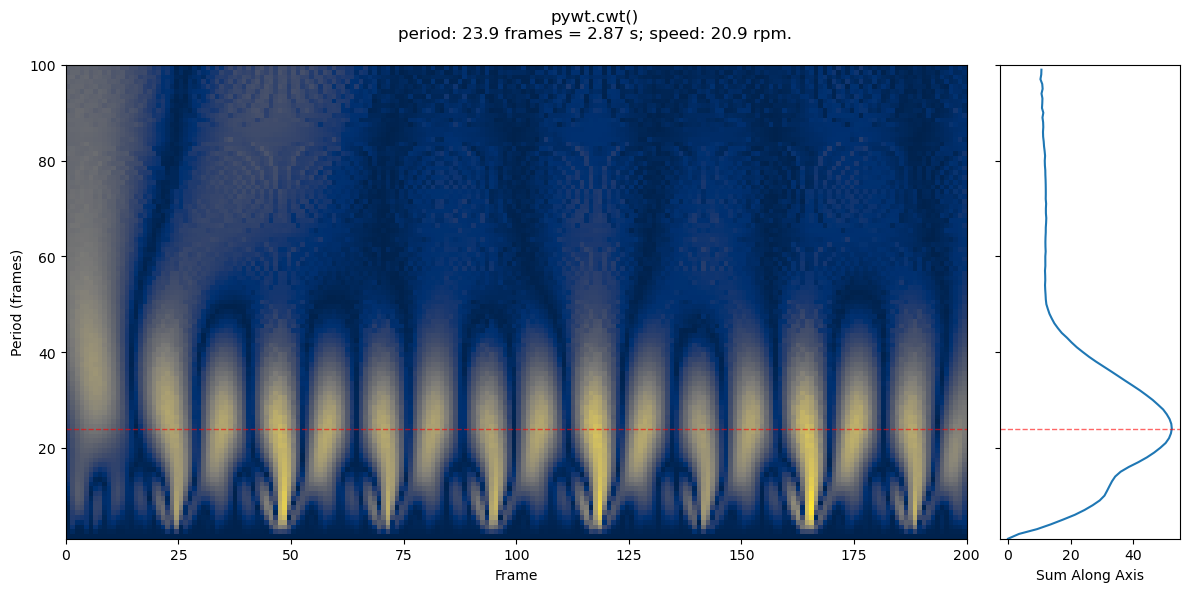

In [63]:
period_from = 1
period_to = 100
period_range = numpy.arange(period_from, period_to)

# CWT with the ricker / mexican hat wavelet
cwt_amplitude, cwt_freqs = pywt.cwt(diff_signal - diff_signal.mean(), period_range * pywt.central_frequency('mexh'), 'mexh')
cwt_amplitude = numpy.abs(cwt_amplitude)

# sum frequencies along axis 1
cwt_sum = cwt_amplitude.sum(axis=1)

# most prominant period
cwt_period = period_range[numpy.argmax(cwt_sum)]

# perform interpolation
interpolation_scale = numpy.linspace(period_from, period_to, 200)  
interpolated = scipy.interpolate.BSpline(*scipy.interpolate.splrep(period_range, cwt_sum))(interpolation_scale)
cwt_period = interpolation_scale[numpy.argmax(interpolated)]

# initalise plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [5, 1]}, sharey=True)

# plot the results
ax[0].imshow(
    cwt_amplitude,
    extent=[0, len(diff_signal), period_to, period_from],
    cmap="cividis",
    aspect='auto',
)
ax[0].set_ylim(period_from, period_to)
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Period (frames)')

ax[1].plot(cwt_sum, period_range)
#ax[1].plot(interpolated, interpolation_scale)
ax[1].set_xlabel('Sum Along Axis')

for n in range(2):
    ax[n].axhline(cwt_period, color="#ff000099", linestyle="--", linewidth=1, label="Detected Frequency")

fig.suptitle(f"pywt.cwt()\nperiod: {cwt_period:.1f} frames = {3 * cwt_period / prop_fps:.2f} s; speed: {20 * prop_fps / cwt_period:.1f} rpm.")
fig.tight_layout()
fig.savefig("BurradaleCWT.png")
plt.show()

## Limitations
Although this methodology demonstrates that angular rotation information could be successfully extracted from Sally the turbine via webcam footage, there are some limitations to this approach:
- Wind turbines pivot so that they can point into the wind and extract maximum power. Wind normally comes from the West pointing the turbine blades nice and perpendicular to the webcam, but if the wind becomes Northerly then the blades rotation is not visible at all to the camera.
- At night time or in cloud and fog the turbine blades are not visible to the camera. However, there is a red light on top of the turbine to warn aircraft whose light output could be monitored for pulses when the blades pass.
- Sally is extremely productive turbine. Wind turbines can angle their blades and exploit gearboxes to maximise power output over a wide range of wind conditions.
For the [Vestas V52](https://www.epd.gov.hk/eia/register/report/eiareport/eia_1242006/html/EIA_Report/Annex%20A3.3.pdf), the rotor speed varies between 14 and 31 rpm depending on the conditions at any given time. 
However, the position of Sally within the Shetlands and the resulting consistent wind meant that only a small range of speeds  was available for analysis over the timeline of this project.
- Period difference analysis requires data from at least &frac13; of a rotation before analysis; and preferably much more data; so significant data gathering (_i.e._ time) is required before a result is obtained.

Despite these limitations, webcam stream analysis was able to consistently extract the rotation speed of Sally for the vast majority of this project, even in medium visibility conditions and when the turbine blades were oblique to the camera.

## Summary
<b>
Overall, the approach of tracking turbine, watching for period repeating patterns worked well to deliver the angular velocity of Sally, the wind turbine.
<br /><br />
Difference analysis using `cv2.matchTemplate` produced clear peaks corresponding to &frac13; rotation that could be extracted with `scipy.signal.find_peaks()` 
and by performing various Fourier Transform analyses (`numpy.fft.rfft()`, `scipy.signal.czt()`, `scipy.signal.stft()`) and Continuous Wavelet Transform (`pywt.cvt()`) to provide a reliable rotational speed.
<br /><br />
Sally's record breaking consistent speed was clearly measurable as she delivered green energy to Shetland and beyond.
</b>